In [1]:
%%capture
!pip3 install -r requirements.txt

In [2]:
import investpy
import datetime
import json
from numpy.core.numeric import True_
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

To get stocks. Update `stocks.json` with your portfolios.

In [3]:
def getStocks(stock_file='stocks.json'):
    """ Load stocks """
    with open(stock_file, 'r') as json_file:
        return json.load(json_file)

In [4]:
def fromDate(purchase_date, date_frmt = '%d/%m/%Y'):
   """ Calc from date """
   today = datetime.datetime.today().strftime(date_frmt)
   if purchase_date == today:
        return today, (datetime.datetime.now() - datetime.timedelta(days=1)).strftime(date_frmt)
   return today, purchase_date


Stock Code: GUBRF

     Cost: 85.3  TRY
  Current: 78.75 TRY
     Gain: -6.55 TRY
   Gain %: -7.68
     Mean: 80.15 TRY
      Max: 82.55 TRY
      Min: 78.75 TRY

            Open   High    Low  Close    Volume Currency  BIST 100
Date                                                              
2021-03-10  81.1  85.65  80.75  82.55  13190867      TRY   1564.94
2021-03-15  79.7  80.15  78.55  78.75   1984350      TRY   1555.47


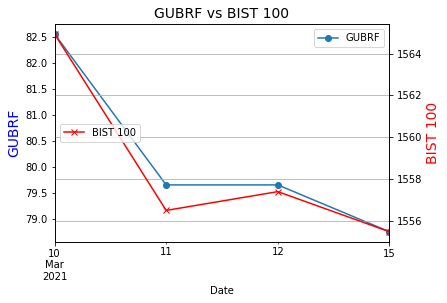


Stock Code: SISE

     Cost: 7.1   TRY
  Current: 7.79  TRY
     Gain: 0.69  TRY
   Gain %: 9.72 
     Mean: 7.62  TRY
      Max: 7.79  TRY
      Min: 7.13  TRY

            Open  High   Low  Close     Volume Currency  BIST 100
Date                                                             
2021-02-26  7.08  7.19  7.04   7.13  113245600      TRY   1471.39
2021-03-15  7.66  7.83  7.65   7.79  131298432      TRY   1555.47


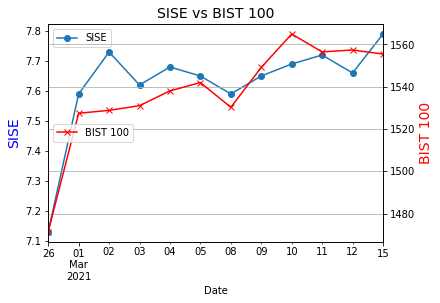


Stock Code: TCELL

     Cost: 16.34 TRY
  Current: 16.61 TRY
     Gain: 0.27  TRY
   Gain %: 1.65 
     Mean: 16.52 TRY
      Max: 17.15 TRY
      Min: 15.65 TRY

             Open   High    Low  Close    Volume Currency  BIST 100
Date                                                               
2020-12-31  16.27  16.35  16.07  16.10  30027676      TRY   1476.72
2021-03-15  16.53  16.66  16.49  16.61  15624499      TRY   1555.47


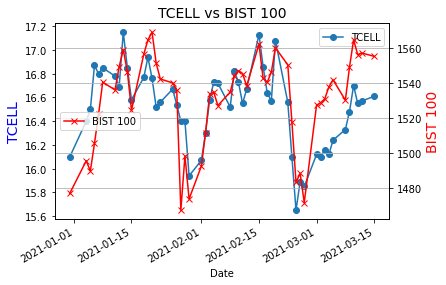


Stock Code: GARAN

     Cost: 8.82  TRY
  Current: 8.72  TRY
     Gain: -0.1  TRY
   Gain %: -1.13
     Mean: 8.72  TRY
      Max: 8.72  TRY
      Min: 8.72  TRY

            Open  High   Low  Close     Volume Currency  BIST 100
Date                                                             
2021-03-15   8.9  8.93  8.71   8.72  143083200      TRY   1555.47
2021-03-15   8.9  8.93  8.71   8.72  143083200      TRY   1555.47


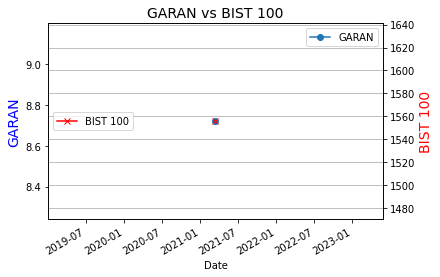

In [5]:
conf = getStocks()

for stk in conf['stocks']:
    
    today, from_date = fromDate(stk['purchase_date'])
    
    df = investpy.get_stock_historical_data(stock=stk['code'], country=conf['country'],
                                            from_date=from_date, to_date=today)
    df_bist = investpy.get_index_historical_data(index=conf['index'], country=conf['country'],
                                            from_date=from_date, to_date=today)
    
    df[conf['index']] = df_bist["Close"]
    stk_mean = df["Close"].mean()
    stk_max = df["Close"].max()
    stk_min = df["Close"].min()

    print("\nStock Code: {}\n".format(stk['code']))
    print("{:>10} {:<5} TRY".format("Cost:", stk['price']))
    print("{:>10} {:<5} TRY".format("Current:", df['Close'].iloc[-1]))
    print("{:>10} {:<5} TRY".format("Gain:", round(df['Close'].iloc[-1]-stk['price'], 2)))
    print("{:>10} {:<5}".format("Gain %:", round(100*(df['Close'].iloc[-1]/stk['price']-1), 2)))
    print("{:>10} {:<5} TRY".format("Mean:", round(stk_mean, 2)))
    print("{:>10} {:<5} TRY".format("Max:", stk_max))
    print("{:>10} {:<5} TRY\n".format("Min:", stk_min))
    print(pd.concat([df.head(1), df.tail(1)]))

    fig0, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    df.plot(y='Close', marker="o", ax=ax0, label=stk['code'])
    df.plot(y=conf['index'], color="red", marker="x", ax=ax1, label=conf['index'])
    plt.legend(loc='center left')
    plt.title("{} vs {}".format(stk['code'], conf['index']), fontsize=14)
    plt.grid(True)
    ax0.set_ylabel(stk['code'], fontsize=14, color="blue")
    ax1.set_ylabel(conf['index'], fontsize=14, color="red")
    plt.show()